# Example Application

## Import Data

### Libraries

In [1]:
import pydaq
import matplotlib.pyplot as plt

### Information

In [2]:
# Test Information
directory = "example_1"
filenames = [
    "./"+directory+"/LE2402_T1.mat",
    "./"+directory+"/LE2402_T2.mat",
    "./"+directory+"/LE2402_T4.mat",
]
test_names = [
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 0.20g",
    "1-50Hz Noise, 0.50g",
]

In [3]:
# Channel information
channel_names = [
    "Acc1-R1",
    "Acc2-R1vert",
    "Acc3-R3",
    "Acc4-R5",
    "Acc5-R7",
    "Pot-R3",
    "Pot-R5",
    "Pot-R7",
    "Acc6-S1",
    "Acc7-S3",
    "Acc8-S3s",
    "Acc9-S5",
    "Acc10-S5s",
    "Acc11-S7",
    "Acc11-S5s",
]
channel_descriptions = [
    "Stack Ring 1Y",
    "Stack Ring 1Z",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Sand (510,0)",
    "Sand (510,242)",
    "Sand (300,242)",
    "Sand (510,462)",
    "Sand (300,462)",
    "Sand (510,682)",
    "Sand (300,682)",
]
units = [
    "g","g","g","g","g",
    "mm","mm","mm",
    "g","g","g","g","g","g","g"
]
calibrations = [
    1,1,1,1,1,
    0.039359,0.038985,0.038477,
    3.110,3.120,3.135,2.905,3.008,3.332,2.908
] #V/unit

### Data Import

In [4]:
# Create tests
test = [pydaq.test.Test() for _ in enumerate(filenames)]
for i,i_test in enumerate(test):
    i_test.read_equals(filename=filenames[i])
    i_test.set_test_info(name=test_names[i])
    i_test.set_channel_info(names=channel_names, descriptions=channel_descriptions, units=units, calibrations=calibrations)
    i_test.baseline_correct()
    i_test.filter()
    i_test.trim()

## Printing and plotting

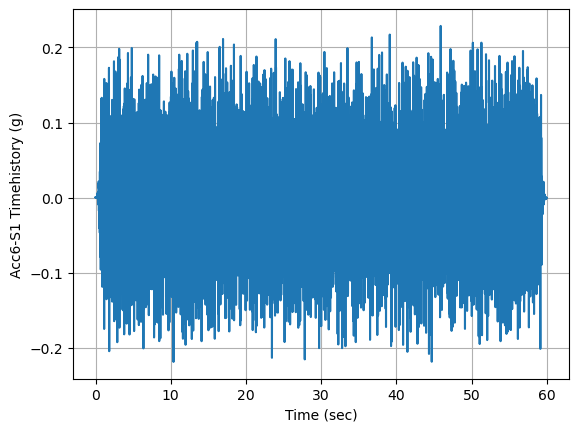

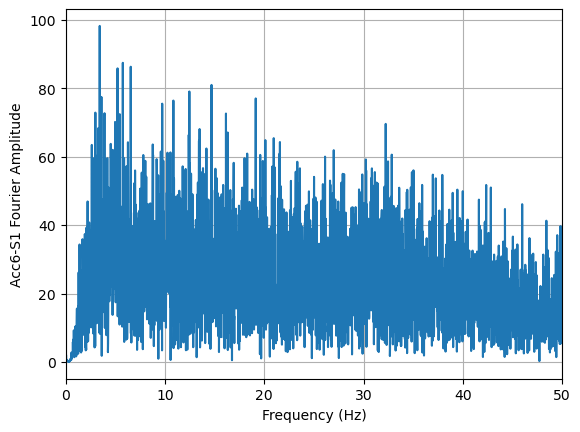

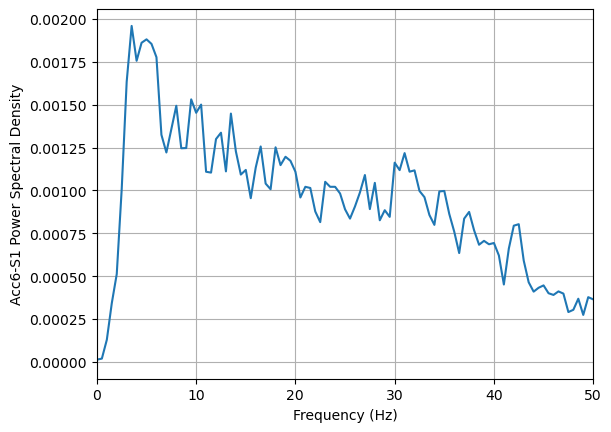

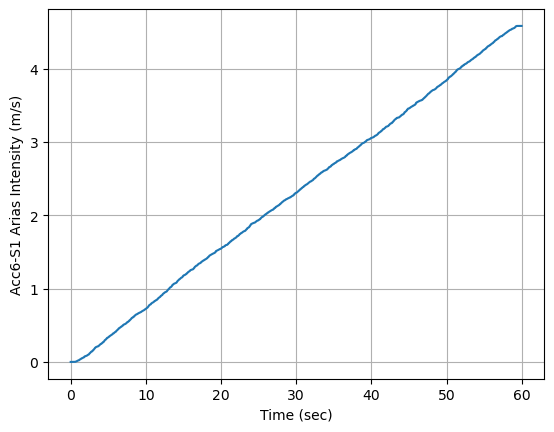

In [5]:
ax = test[1].channel[8].plot(plot_type="Timehistory")
ax = test[1].channel[8].plot(plot_type="Fourier")
ax = test[1].channel[8].plot(plot_type="Power", nperseg=1024)
ax = test[1].channel[8].plot(plot_type="Arias")

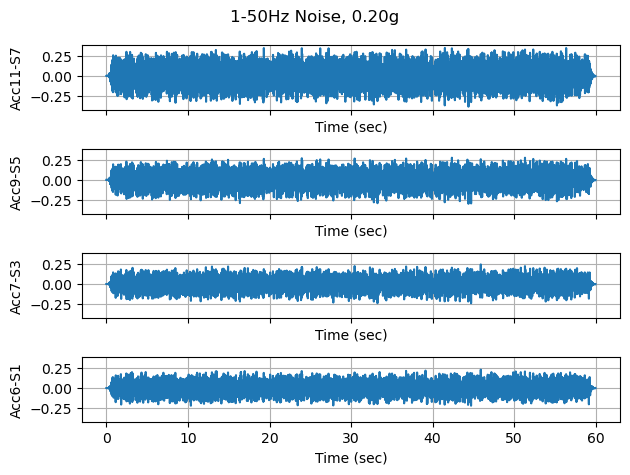

In [6]:
ax = test[1].plot(channels=[13,11,9,8], columns=1, plot_type="Timehistory") #same inputs as above

In [7]:
for i in [0,1,2]:
    th=test[i].channel[8].timehistory()[1]
    print(f"{test[i].name}: t_max = {th[0]}, a_max = {th[1]}")

1-50Hz Noise, 0.06g: t_max = 30.677631999999996, a_max = 0.07319755579038931
1-50Hz Noise, 0.20g: t_max = 45.89542399999999, a_max = 0.22870403819617482
1-50Hz Noise, 0.50g: t_max = 30.386784, a_max = 0.5476717279911985


1-50Hz Noise, 0.06g: fn = 33.01901895491803, ksi = 0.11764261231184042
1-50Hz Noise, 0.20g: fn = 27.015560963114755, ksi = 0.2131420393106963
1-50Hz Noise, 0.50g: fn = 17.009797643442624, ksi = 0.5134204786855888


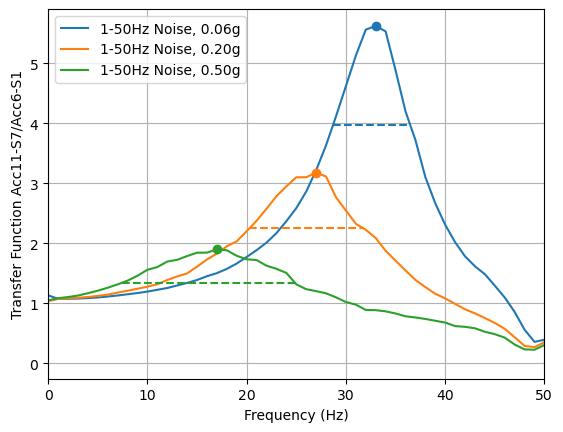

In [8]:
fix,ax = plt.subplots()
for i in [0,1,2]:
    tf=test[i].transfer_function(channel_from=8, channel_to=13, axis=ax, find_peak=True, find_damping=True, nperseg=512)
    print(f"{test[i].name}: fn = {tf[2][0]}, ksi = {tf[3]}")
leg=ax.legend()

In [10]:
test[0].export_to_csv(filename="example.csv")

ValueError: could not broadcast input array from shape (30505,) into shape (30705,)